Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or # tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Importing all the necessary libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


Reading and checking the dataset

In [86]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
df.shape

(8807, 12)

In [88]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Renaming the listed in column to genres

In [89]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

Dropping the show_id column as it may be of no use in the analysis

In [90]:
df.drop(columns='show_id',inplace=True)

Checking for duplicates

In [91]:
df.duplicated().sum()

0

In [92]:
df.nunique().sort_values(ascending=False)

title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
genre            514
duration         220
release_year      74
rating            17
type               2
dtype: int64

Checking the missing values

In [93]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                    ',missing_data['Missing Value Count'].sum(),'      ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8807
            Missing Value Count  Percentage
director                   2634       29.91
country                     831        9.44
cast                        825        9.37
date_added                   10        0.11
rating                        4        0.05
duration                      3        0.03
Total                      4307        48.9


Dropping the rows which have null values in date_added column as there are only 10 values which sums up to only 0.11% of the total values


In [94]:
df.dropna(subset = ['date_added'],inplace=True)
df['date_added'].isna().sum()

0

Dropping the rows which have null values in rating column as there are only 4 values which sums up to only 0.05% of the total values


In [95]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

Dropping the rows which have null values in duration column as there are only 3 values which sums up to only 0.03% of the total values


In [96]:
df.dropna(subset = ['duration'],inplace=True)
df['rating'].isna().sum()

0

In [97]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8790
          Missing Value Count  Percentage
director                 2621       29.82
country                   829        9.43
cast                      825        9.39
Total                    4275       48.63


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


Converting the date added column from object to datetime format


In [99]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


Adding day, month, year, month_name, day_name as seperate columns to the dataframe as these will help us in analysis

In [100]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


Checking for unique values of rating and categorising them for better understanding

In [101]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Netflix has officially categorised theese into 3 main categories (https://help.netflix.com/en/node/2064/us), so using that for our EDA 

Replacing 'TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV' to Kids,

'PG-13','TV-14' to Teens,

'R','TV-MA','NC-17' to Adults,

and 'NR','UR' to null values.

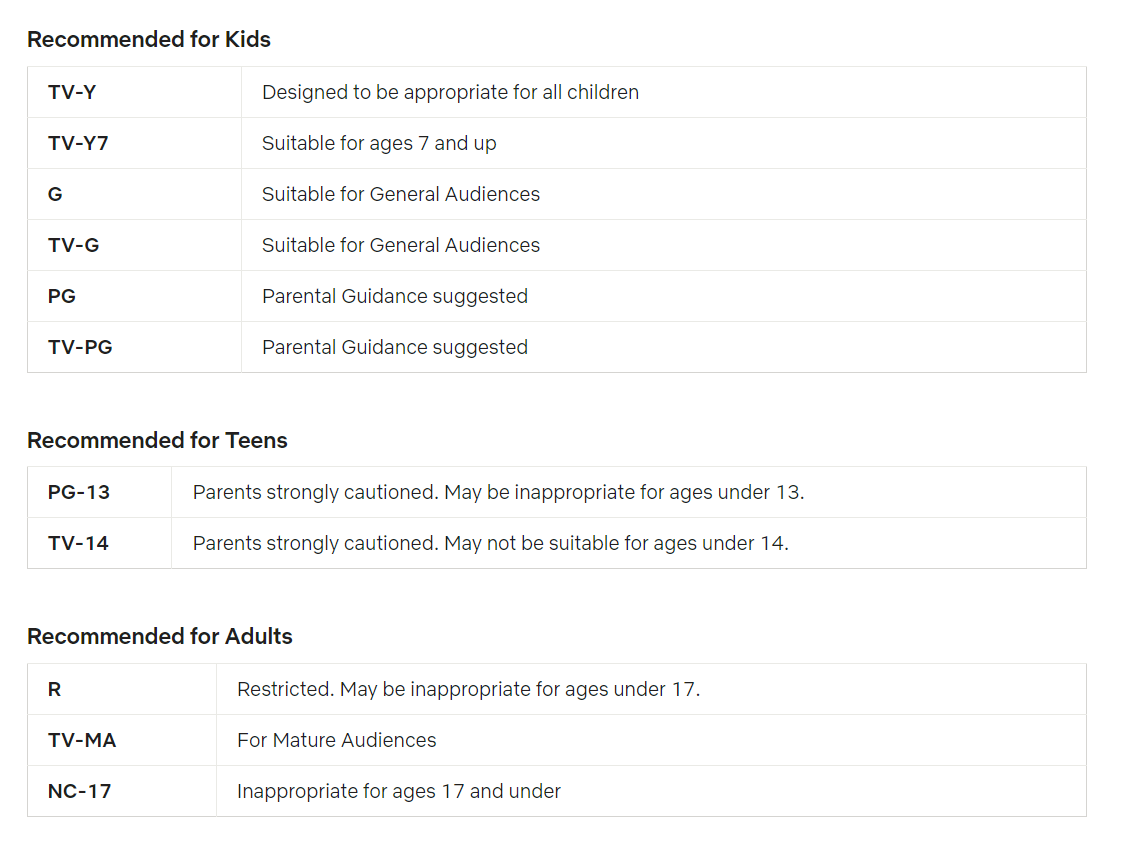





In [102]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [103]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

From here it is confirmed that values have been replaced successfully and now we will delete rows that have null values.

In [104]:
df['rating'].isna().sum()

82

In [105]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

82 values were null, whhich was only about 1% of the data, so we deleted those rows.

In [106]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8708
          Missing Value Count  Percentage
director                 2617       30.05
country                   829        9.52
cast                      808        9.28
Total                    4254       48.85


Now, we still have about 48% missing data. So, we will check in which rows the director, country and cast all three are null, if all these 3 are null then there is no use of that row.

In [107]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

We found out that total 96 such rows are there which dont have director, country and cast as null, so deleting those rows.

In [108]:
df.shape

(8708, 16)

In [109]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8612, 16)

In [110]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8612
          Missing Value Count  Percentage
director                 2521       29.27
country                   733        8.51
cast                      712        8.27
Total                    3966       46.05


As the missing value percentage of these rows are significant, we cant delete them so we will deal with those later and now lets focus

on one more major problem in the dataset which is NESTED DATA in director, cast, country, and genre.

In [111]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday


Now we will split all the nested data individually and save them in a new dataframe, and then we will merge all of them so get the final dataframe.

In the process we will lose the format of null values from np.NaN to string NaN, so that requires one additional step which is done in the last 2 lines of each block
We can confirm the count of null values from the above block

In [112]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[['title',0]]
df_cast.columns =['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)
df_cast.isna().sum()

title      0
cast     712
dtype: int64

In [113]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title',0]]
df_genre.columns =['title','genre']
df_genre.replace('nan',np.NaN,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [114]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title',0]]
df_director.columns =['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

In [115]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [116]:
df12 = df_cast.merge(df_genre, on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [117]:
df123 = df_director.merge(df12, on = 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [118]:
df1234 = df_country.merge(df123, on = 'title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [119]:
df_new = df.merge(df1234, on = 'title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [120]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [121]:
df_new.shape

(199950, 16)

This is the new dataframe which has 199950 rows and 16 columns after unnesting the data

In [122]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
          Missing Value Count  Percentage
director                50116       25.06
country                 11710        5.86
cast                     1894        0.95
Total                   63720       31.87


Here we will not delete the missing values as it will affect the data and other columns will get manipulated, hence we will replace them with a global value 'unknown'

In [123]:
df_new['cast'] = df_new['cast'].replace(np.NaN,'Unknown')
df_new['country'] = df_new['country'].replace(np.NaN,'Unknown')
df_new['director'] = df_new['director'].replace(np.NaN,'Unknown')

In [124]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [125]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
Empty DataFrame
Columns: [Missing Value Count, Percentage]
Index: []
Total                   0       0.0


After replacing we can confirm no more null values

In [126]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199950 entries, 0 to 199949
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          199950 non-null  object        
 1   title         199950 non-null  object        
 2   date_added    199950 non-null  datetime64[ns]
 3   release_year  199950 non-null  int64         
 4   rating        199950 non-null  object        
 5   duration      199950 non-null  object        
 6   description   199950 non-null  object        
 7   day           199950 non-null  int64         
 8   month         199950 non-null  int64         
 9   year          199950 non-null  int64         
 10  month_name    199950 non-null  object        
 11  weekday       199950 non-null  object        
 12  country       199950 non-null  object        
 13  director      199950 non-null  object        
 14  cast          199950 non-null  object        
 15  genre         199

In the new dataframe, we can see 55 rows which are duplicated, so deleting them.

In [127]:
df_new.duplicated().sum()

55

In [128]:
df_new.drop_duplicates(keep='first',inplace=True)

In [129]:
df_new.shape

(199895, 16)

Creating 2 more dataframes for better analysis by dividing the present dataframe on the basis of type i.e Movie and TV Show and naming them df_movies and df_tvs.

In [130]:
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [131]:
df_movies.shape

(144240, 16)

In [132]:
df_tvs.shape

(55655, 16)

The duration column has values such as 90 minutes for movies and 2 seasons for tv shows, so we will remove the word 'minutes' and 'seasons' in their respective dataframes.

In [133]:
df_movies['duration'] = df_movies['duration'].str.replace('min',"")
df_movies.head()

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\772087966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace('min',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [134]:
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\4164884425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\4164884425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


Here, we are replacing the column duration with a better name season for tv shows only in df_tvs.

In [135]:
df_tvs.rename(columns={'duration':'seasons'},inplace=True)

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\3221938497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'seasons'},inplace=True)


Finally, we have 4 dataframes, we will use all of these according to the analysis required ahead.

df = Cleaned data before unnesting.

df_new = Cleaned data after unnesting.

df_movies = Cleaned data of type - movie after unnesting.

df_tvs = Cleaned data of type - TV Show after unnesting.

# We are ready with out dataframes, and also ready to begin our EDA!

Lets start with checking the time period of our data.

In [136]:
print(df['year'].min())
print(df['year'].max())

2008
2021


The data lies between the year 2008 and 2021.

Now lets see the count of content available on Netflix.

In [137]:
df.shape[0]

8612

The Netflix library has 8612 movies or shows to watch.

Now, lets see the count of movies and TV Shows individually.

In [138]:
print('Movie: ', df[df['type']=='Movie'].shape[0])
print('TV Show: ', df[df['type']=='TV Show'].shape[0])

Movie:  6031
TV Show:  2581


There are a total of 6031 movies and 2581 TV shows to available.

Now, lets see how many directors are present in the data.

In [139]:
df_director['director'].nunique()

4925

There are a total of 4925 directors present in the data.

Now, lets see the count of actors present.

In [140]:
df_cast['cast'].nunique()

36148

There are a total of 36148 actors present in the data.

Lets check in how many countries in the data distributed in.

In [141]:
df_country['country'].nunique()

127


The content is distributed across 127 countries.

Lets start our visualisation with seeing the distribution of content on Netflix. Here we will use df as we only need to count the row once.

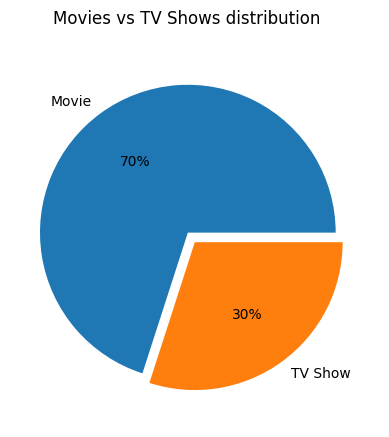

In [142]:
labels = ['Movie', 'TV Show']
plt.pie(df.groupby('type')['type'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()

Inference

Netflix has 70% of its content as movies.

TV Shows are clearly lesser than Movies.

Recommendations

More TV Shows should be added as they create more suspense and have more story than a 100 minute movie. Users like to binge watch a particular story for a longer time.

Lets see the content distribution across countries.

Here we need the unnested data for countries which is in df_new and we need to count the titles. After unnesting there is only one dataframe which has multiple rows because we also unnested the director, cast and genre, so hence we will do a drop_duplicate function on the df_new so that we will only get one row of the title and country group.

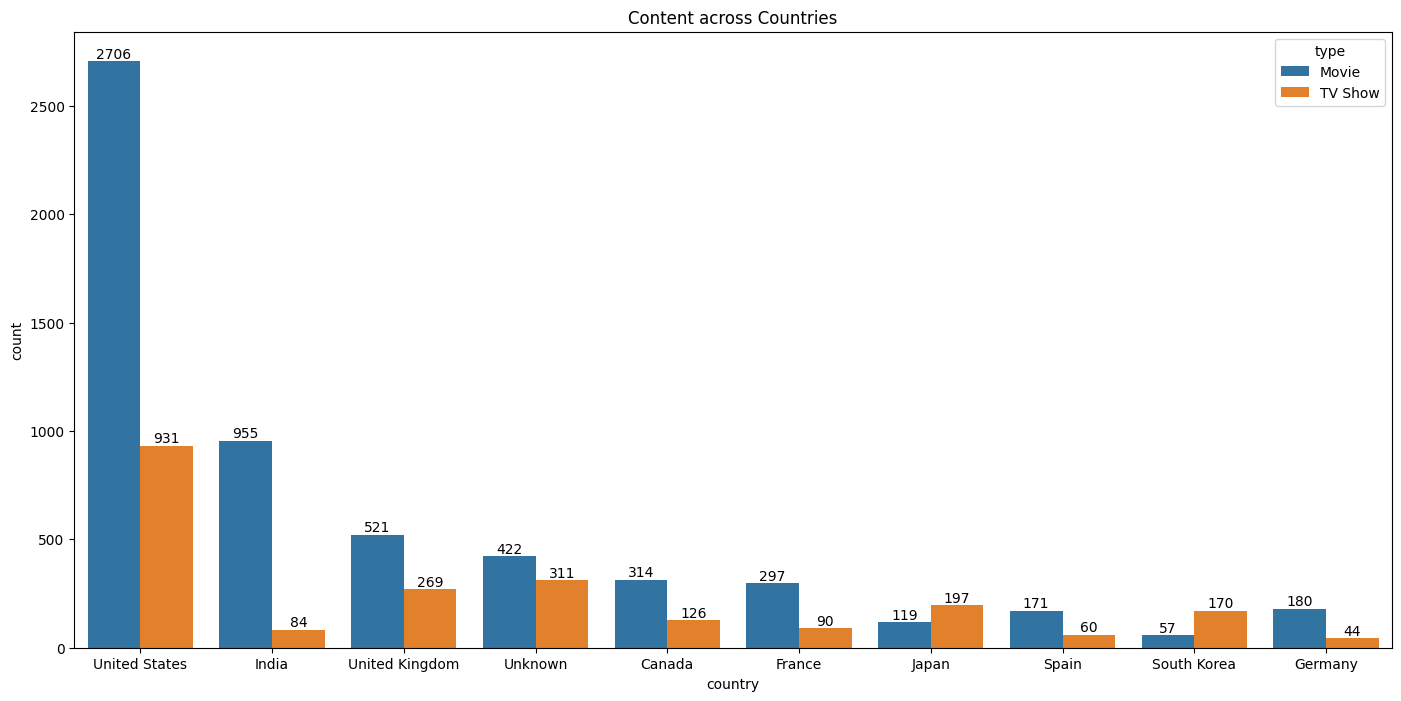

In [143]:
df_temp = df_new.drop_duplicates(subset = ['country', 'title'])

x = df_temp['country'].value_counts().head(10)

plt.figure(figsize = (17,8))
plt.title('Content across Countries')
label = sns.countplot(data = df_temp, x = 'country', hue = 'type', order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

Inference

US has the most content for movies followed by India and UK. TV Shows are mostly created in the US and UK.
We can also observe that all the countries have more movies than TV Shows, whereas Jpaan and South Korea have more TV shows than movies.


Recommendation

The difference between the number of movies and Tv shows for all the countries is very high especially for India. This should be minimised by adding more TV Shows as TV Shows can keep a user engaged for 2-3 seasons rated than a 100 minute movie.

TV Shows have also been very popular in recent times and are the new and demanded versions of a movie.


Lets see the top 10 Directors.

Here we need unnested data of directors only so we will drop duplicates on director, title group in df_movies and df_tvs.

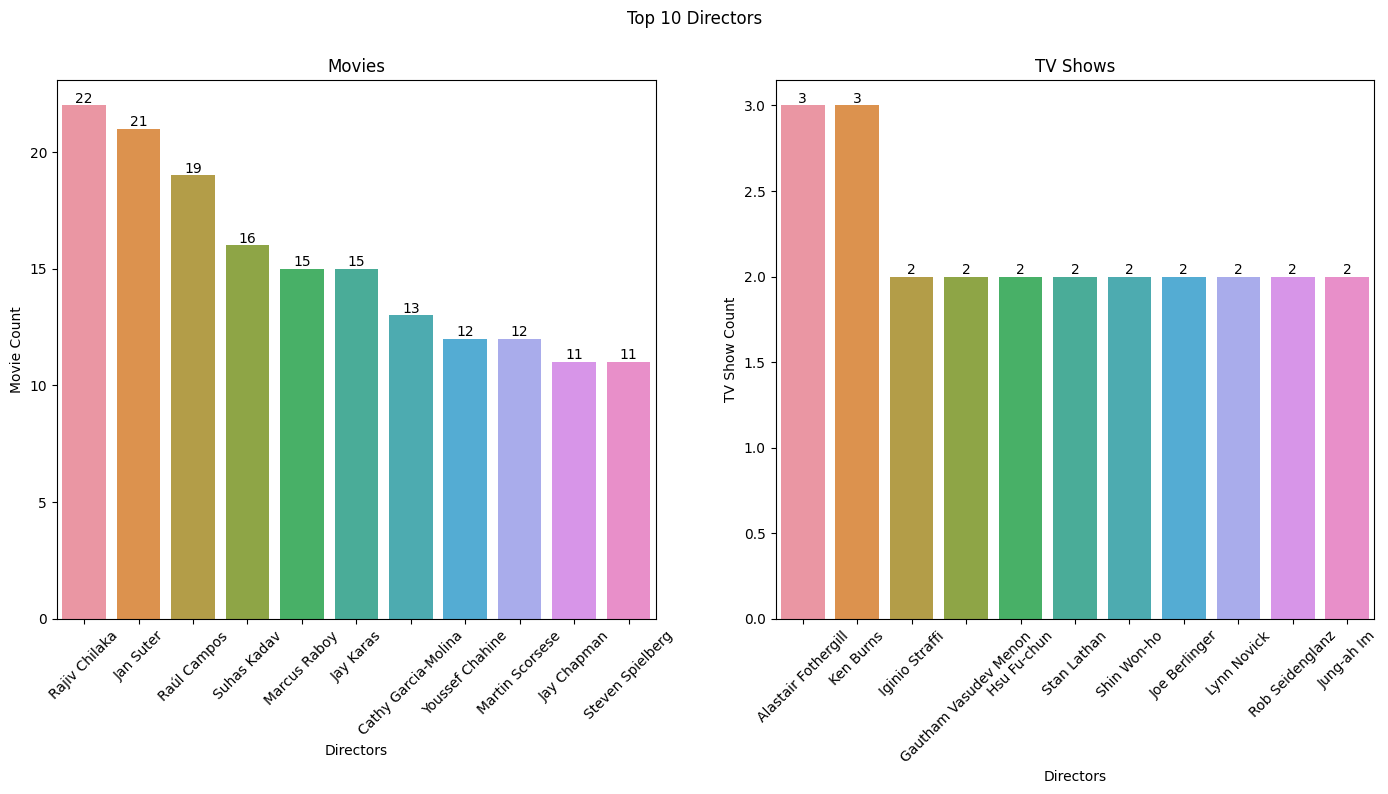

In [144]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='director', order = df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='director', order = df_tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

Inference

Rajiv Chilaka, Jan Suter, Raul Campos are the most active directors with 22, 21 and 19 movies, whereas for TV Shows all the directos have directed around 2-3 shows only.

Lets see the top 10 Genres

Here we need unnested data of genres only so we will drop duplicates on genre, title group in df_movies and df_tvs.


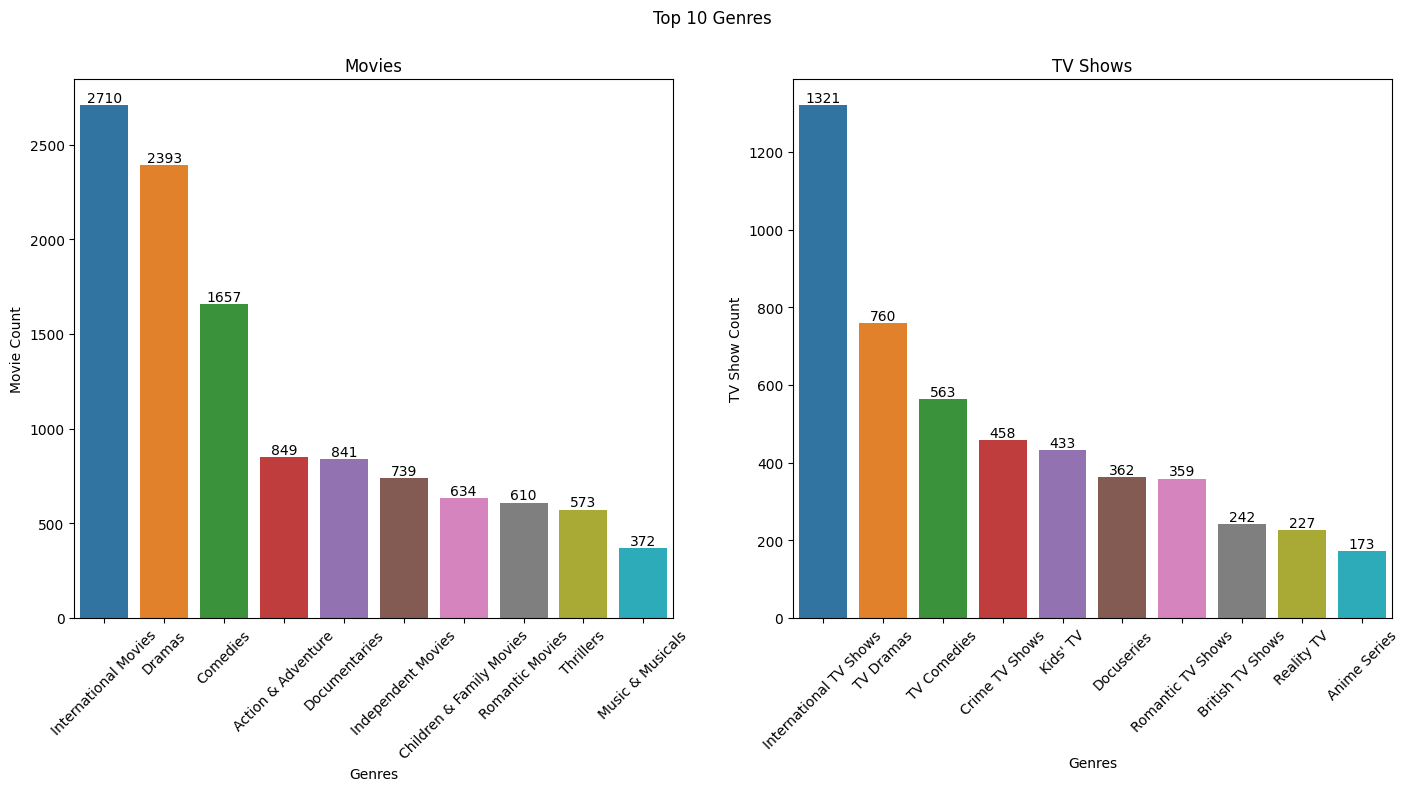

In [145]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies_temp, x='genre', order = df_movies_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='genre', order = df_tvs_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

Inference

From the above graph, it is inferred that most of the content fall under International followed by Drama and Comedy genre

Recommendations

The count of International genre is very high as compared to other genres for TV Shows, Netflix should try adding more content of different genres as well.

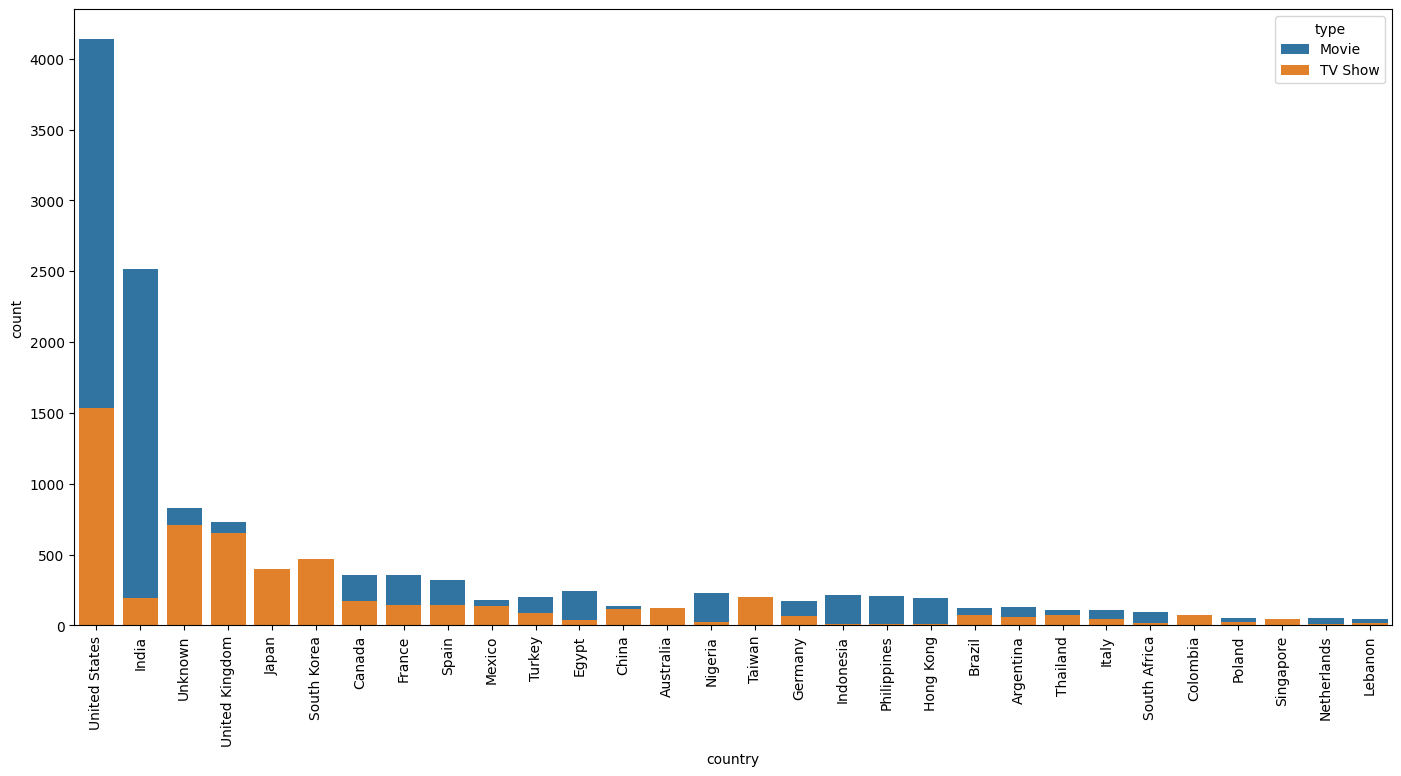

In [146]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (17,8))
plt.xticks(rotation=90)
sns.countplot(data = df_temp, x='country', hue = 'type', dodge = False, order = df_temp['country'].value_counts().head(30).index)
plt.show()

Lets see the content age group wise available

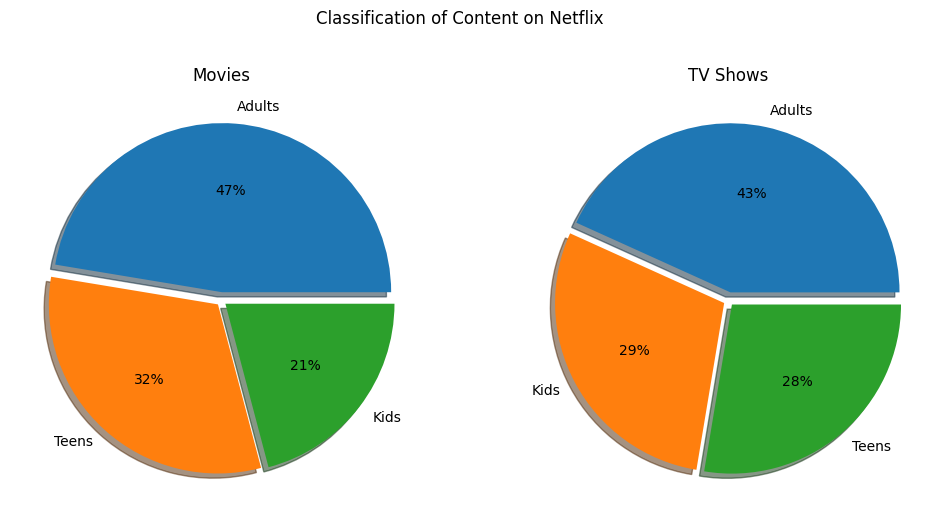

In [147]:
df_movies_temp = df_movies.drop_duplicates(subset = ['rating','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index, autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index, autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('TV Shows')

plt.show()

Inference

Most content on Netflix is for the adults followed by Teens and Kids.

Recommedation

 More content should be added for the teens so as to increase the viewership.

Now, lets see when does netflix add movies and tv shows the most

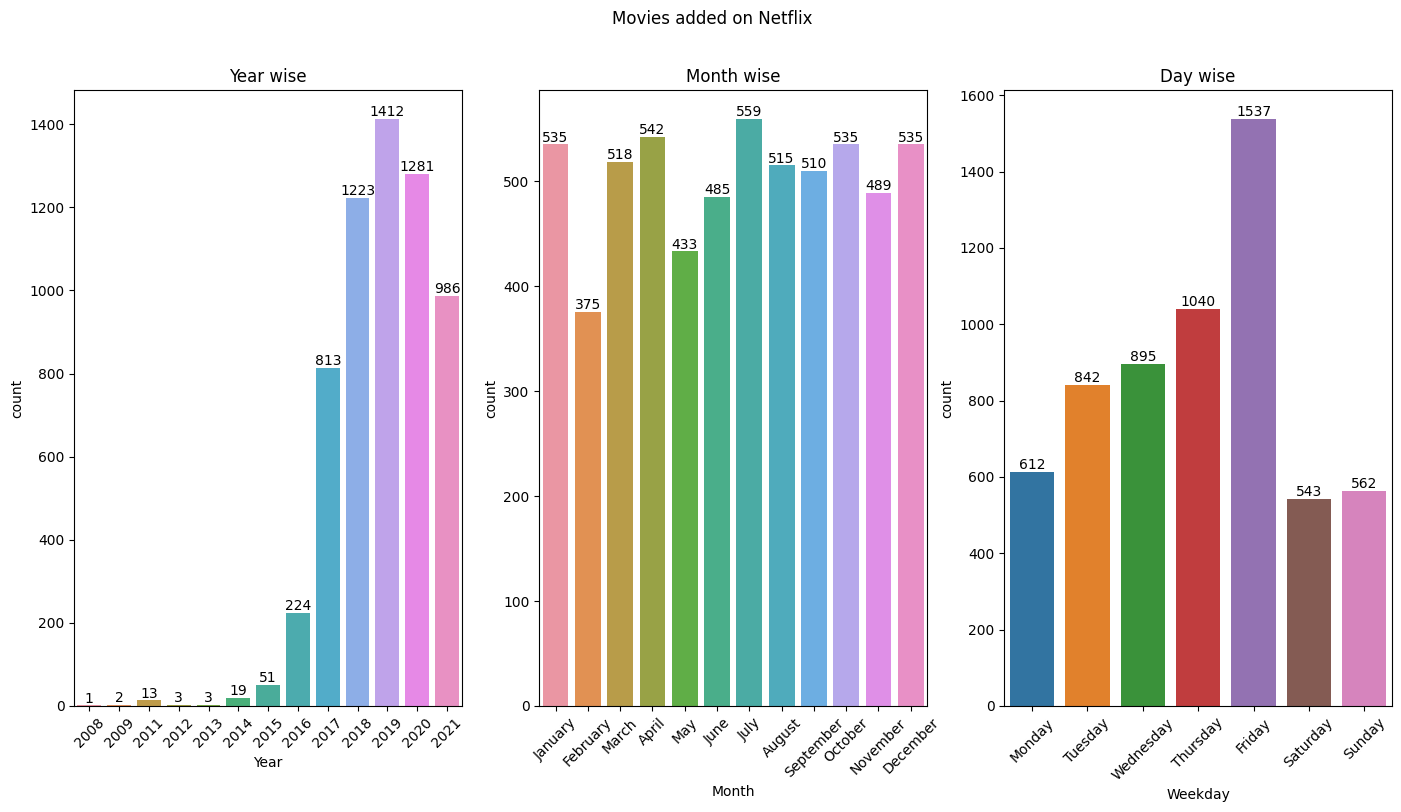

In [148]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

Inference

As per the data, most movies were released in the year 2019 and 2020. They were released the most in July. We can also see that most movies were released on Friday.

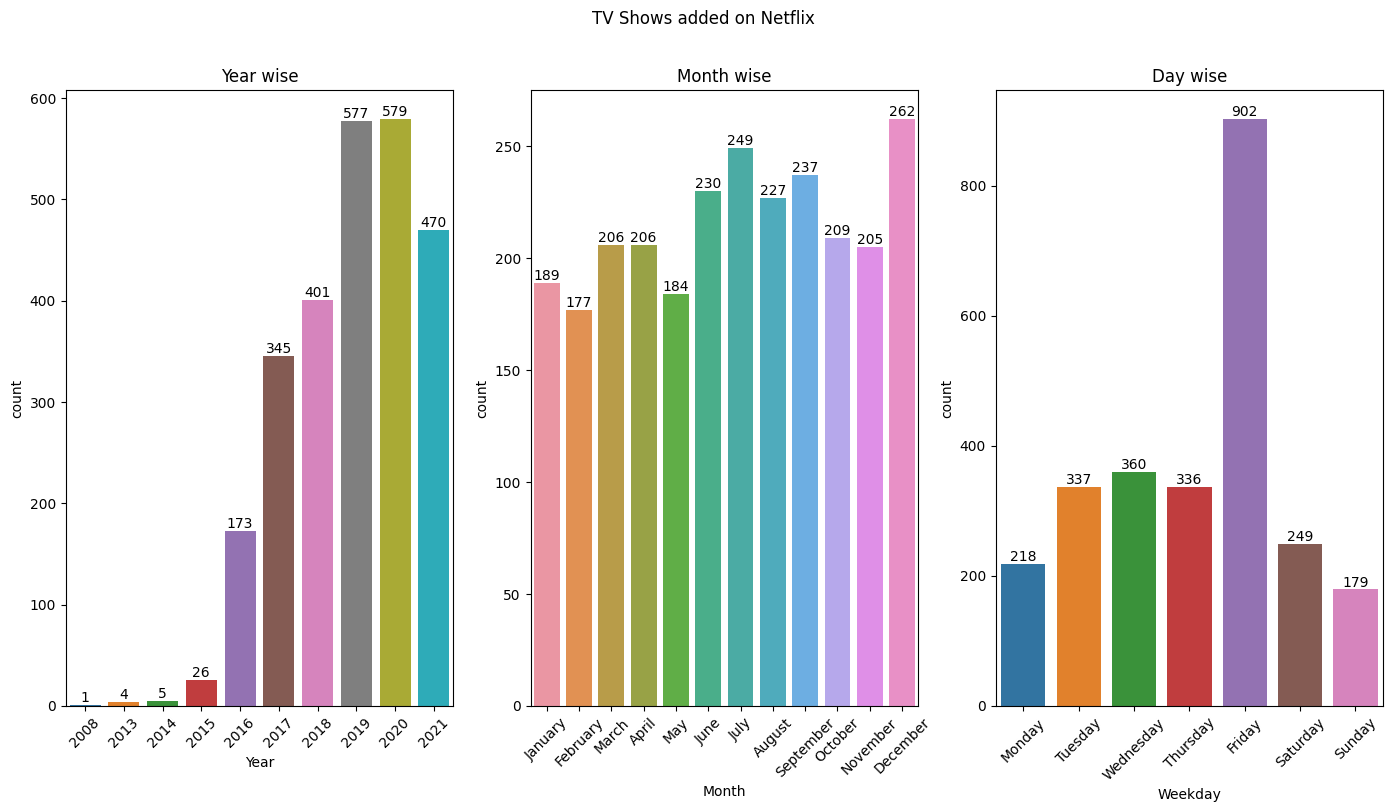

In [149]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year', order = tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name', order = tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday', order = tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

Inference

As per the data, most TV Shows were released in the year 2019 and 2020. They were released the most in December followed by July and September. We can also see that most shows were released on Friday.

To increase viewership in India, more shows should be released during the vacation or festival seasons which are around April-May and between October and December.


Lets see the average duration of a movie and a average season of TV Show

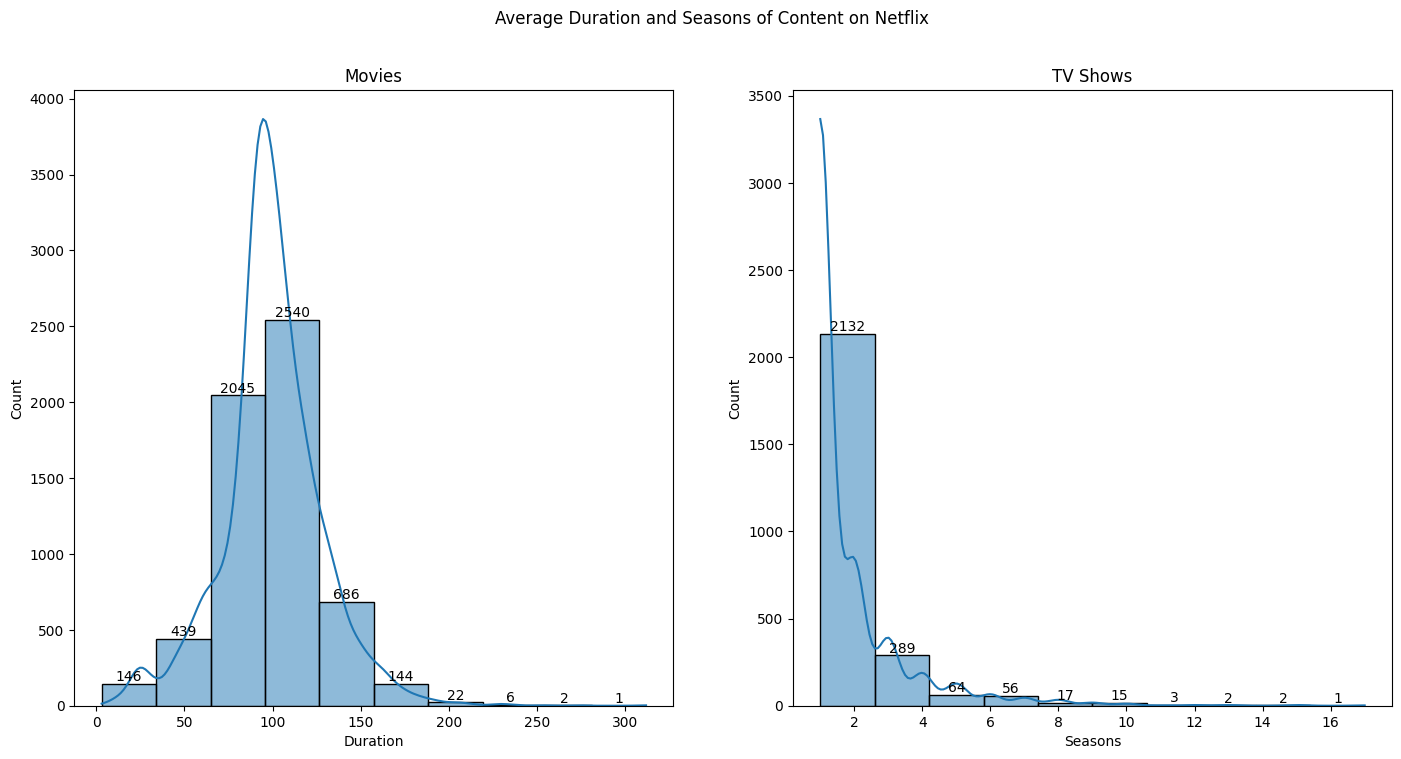

In [150]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['seasons','title'])


plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

Inference

Most (Around 4500) movies have duration between 65 and 125 minutes. Most(Around 2200) TV Shows have been produced for around 2 seasons.


Recommendations

Duration must be kep between 65 and 125 minutes for a movie and a TV Show should have around 2-3 seasons

Lets see the range of most movie's duration and tv show's seasons lie.

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\785406378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\785406378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)


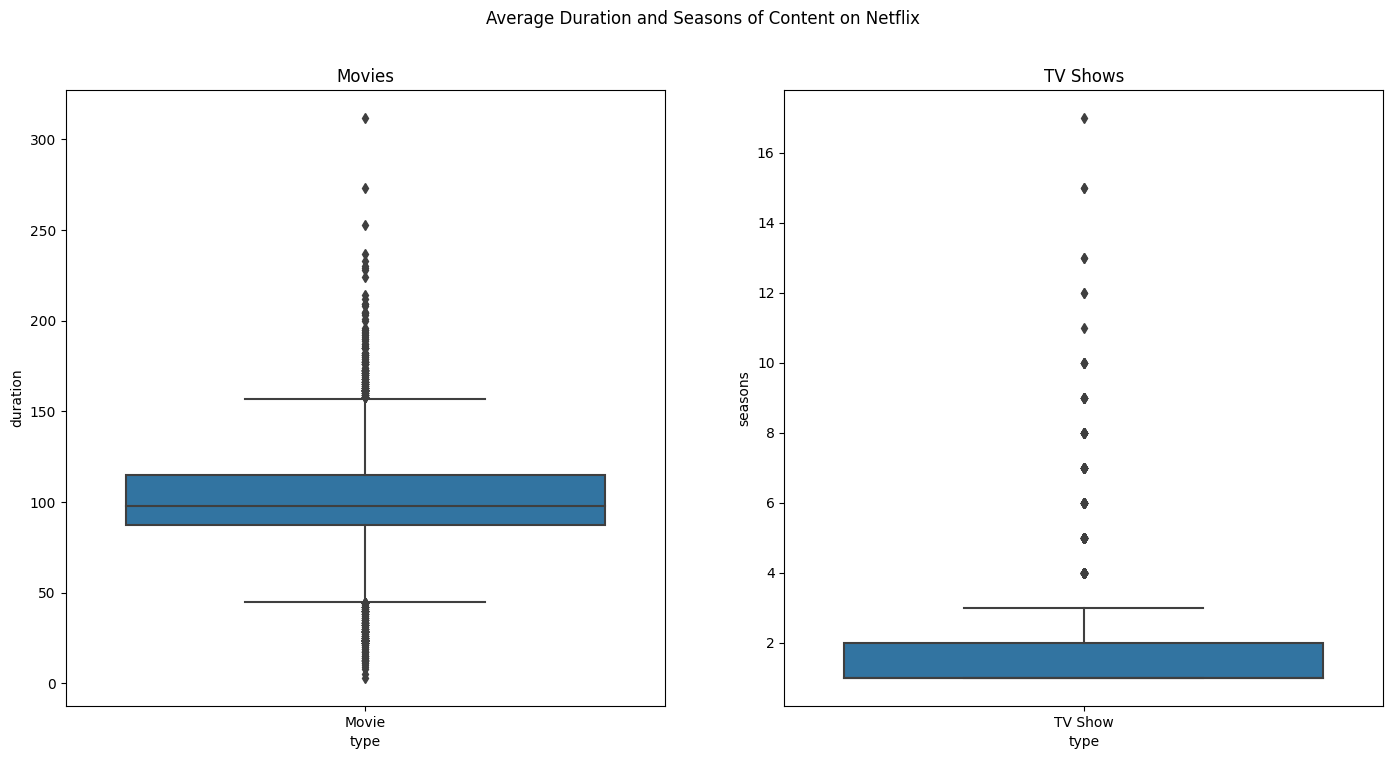

In [151]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x='type', y='seasons')
plt.title('TV Shows')

plt.show()

Inference

The median duration of a movie on Netflix is around 100 minutes, whereas the median season of a TV Show is 1 season.

Most movies have duration length between 50 and 160 minutes. Most TV shows have either 1,2 or 3 seasons.

Recommendation

In order to keep the audience engaged, it is recommended to keep the movie length upto 160 minutes and upto 3 seasons for a TV Show.

Lets see most active actors for movies and tv shows seperately.

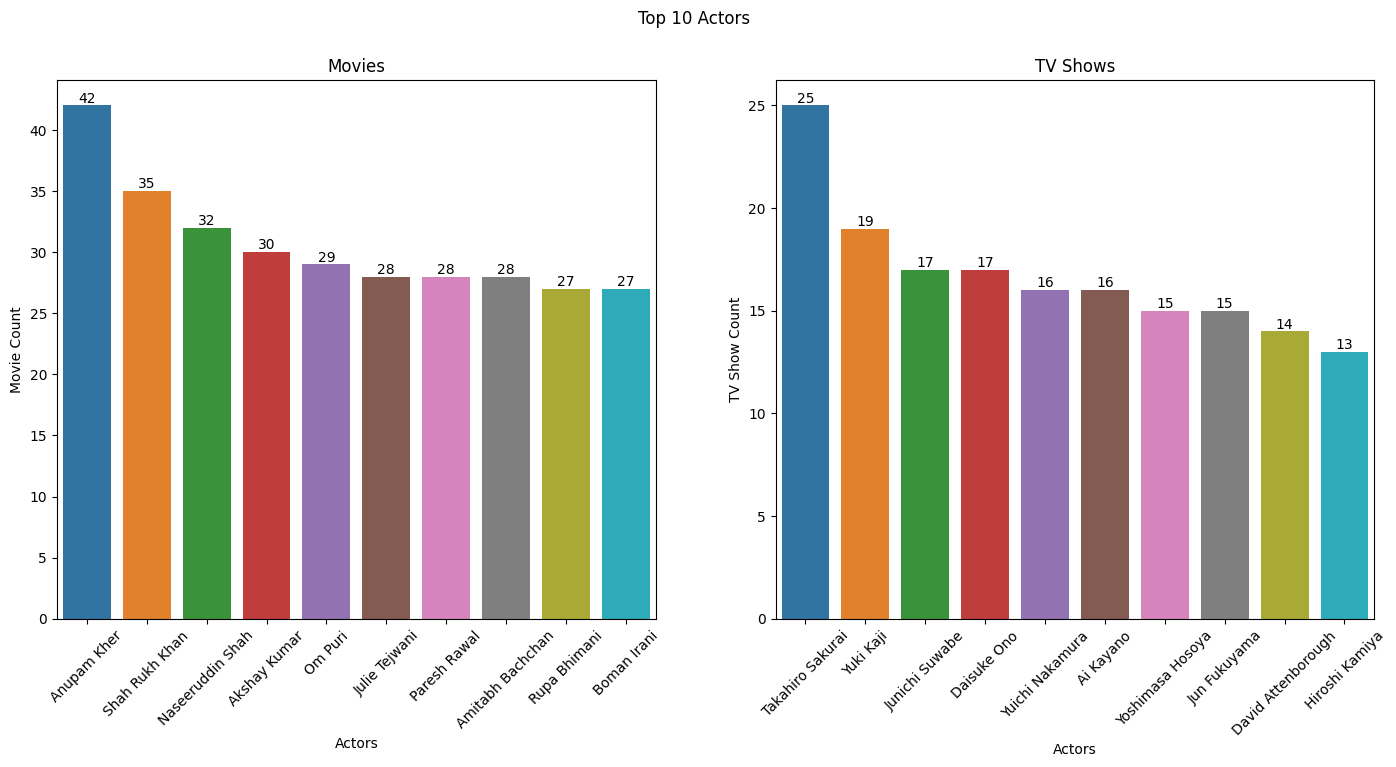

In [152]:
df_movies_temp = df_movies.drop_duplicates(subset = ['cast','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['cast','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='cast', order = df_movies_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='cast', order = df_tvs_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Show Count')

plt.show()

Inference

We can clearly see that Anupam Kher has done the most amount of movies followed by Shah Rukh Khan and Naseeruddin Shah.

 The top 10 actors for movies are all Indians, whereas the top 10 actors for TV Shows are from different countries.

8 out of the top 10 actors for movies are males and 2 are females.


Recommendations

TV Shows have very few Indian actors as compared to other actors. To increase viewership of TV Shows in India, Netflix should add more TV Shows with Indian actors in it.

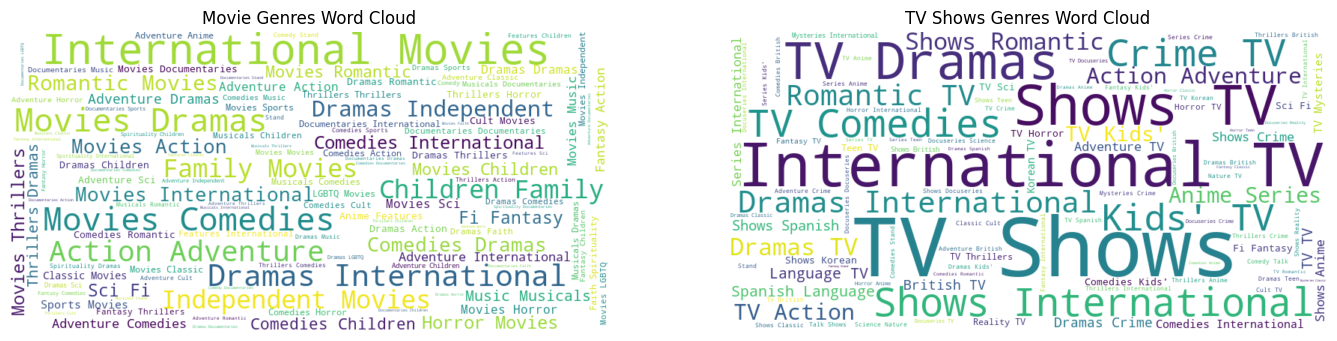

In [153]:
genre_text = " ".join(df_movies["genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.figure(figsize=(17, 10))

plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres Word Cloud")

genre_text = " ".join(df_tvs["genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud")

plt.show()

Lets see the correlation in our data.

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_16892\2437158043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), cmap = 'Blues', annot=True)


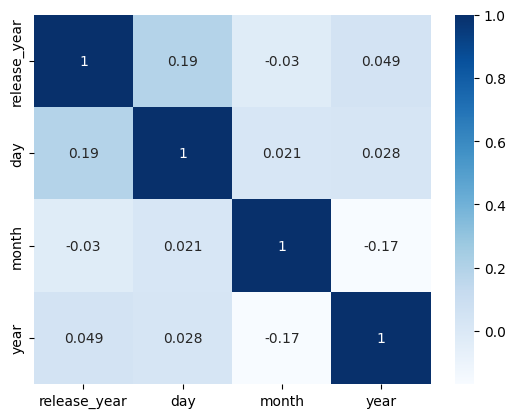

In [154]:
sns.heatmap(df_new.corr(), cmap = 'Blues', annot=True)
plt.show()

Inference

The heatmap shows the relation between numerical values of the data. Heatmap in our case gives us no interpretation as the only numerical values which we have in our data are the day, month and year of the movie or tv show.

Lets see distribution of genre and rating among themselves.

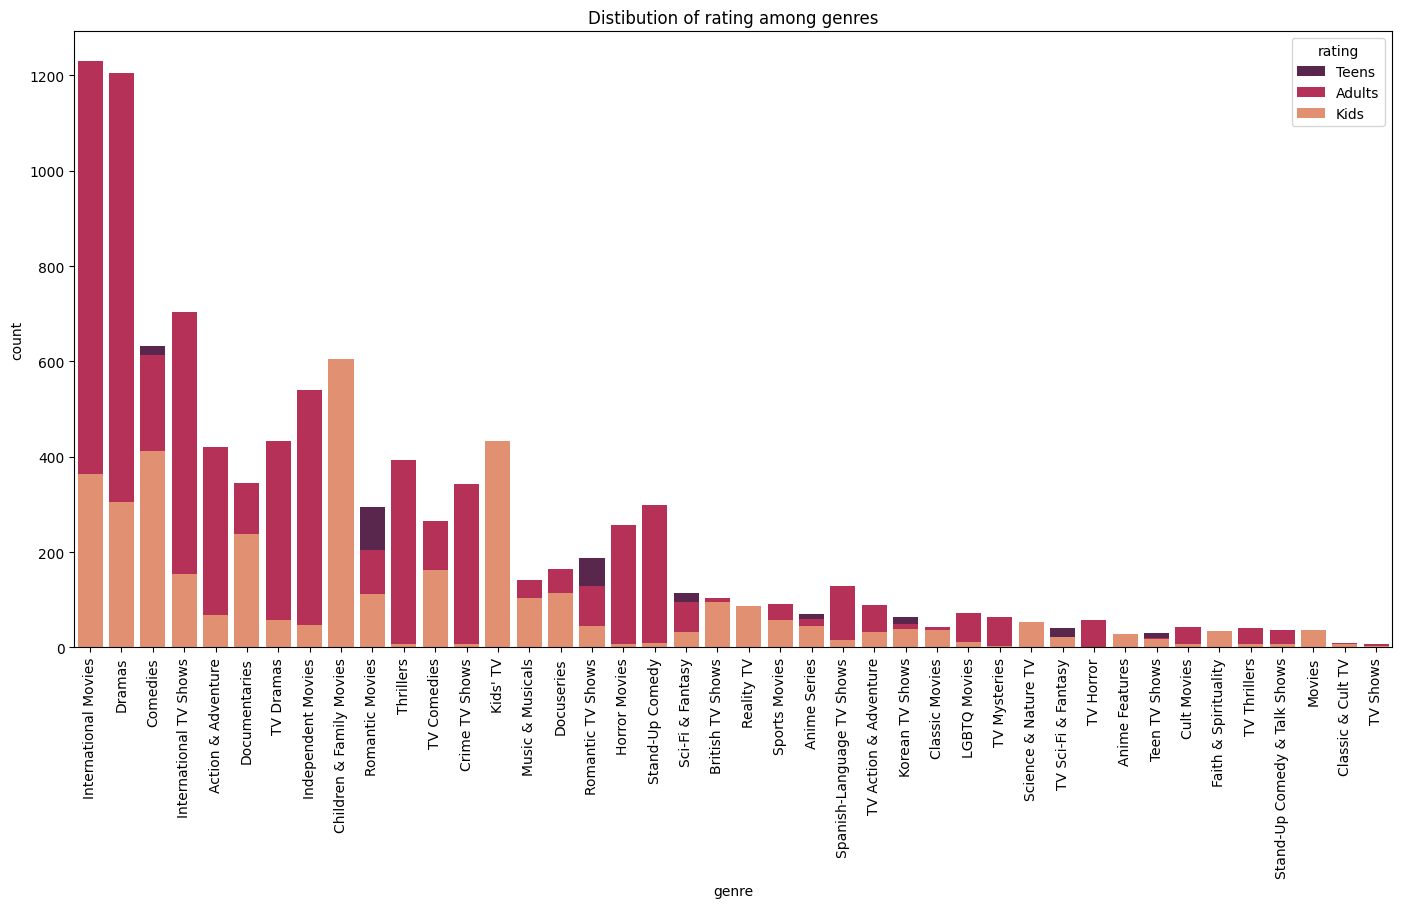

In [156]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of rating among genres')
sns.countplot(data=df_temp, x='genre', hue = 'rating', dodge=False, order = df_temp['genre'].value_counts().index, palette='rocket')
plt.xticks(rotation=90)
plt.show()

Inference

We can clearly see that most content(both movies and tv shows) are made for adults.

Recommendations

To increase more users, netflix should diversify the content for teens and kids as well.

Lets see distribution of genres across countries.

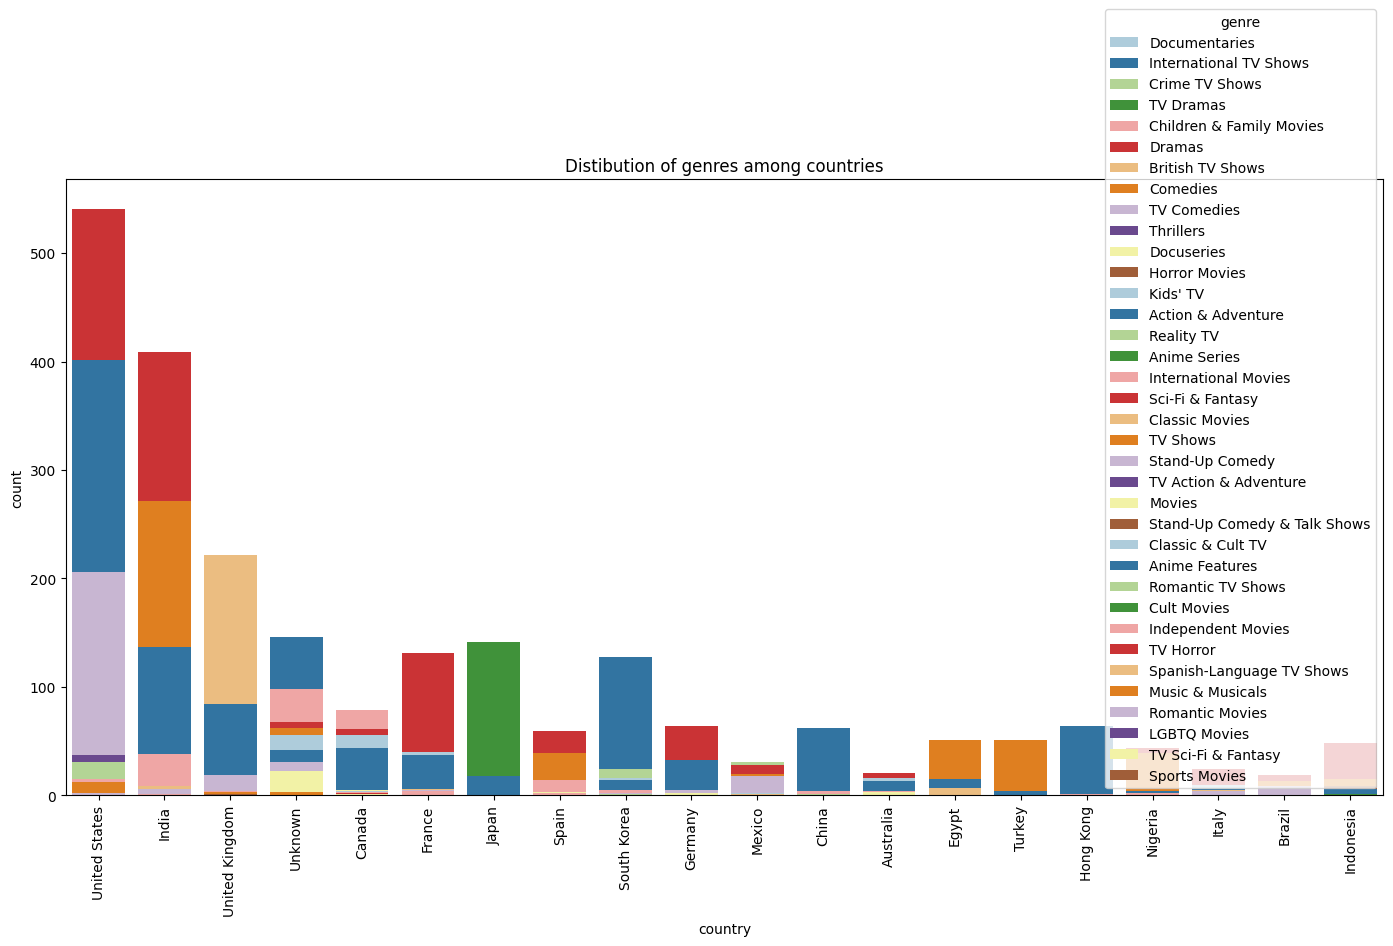

In [157]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of genres among countries')
sns.countplot(data=df_temp, x='country', hue = 'genre', dodge=False, order = df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()

Inference

We can observe that International(Blue color) and Drama(Red color) are the most type of content available on Netflix.

Recommendations

Netflix should produce more different genres also in order to attract and increase viewership.

Lets see countrywise content rating classification.

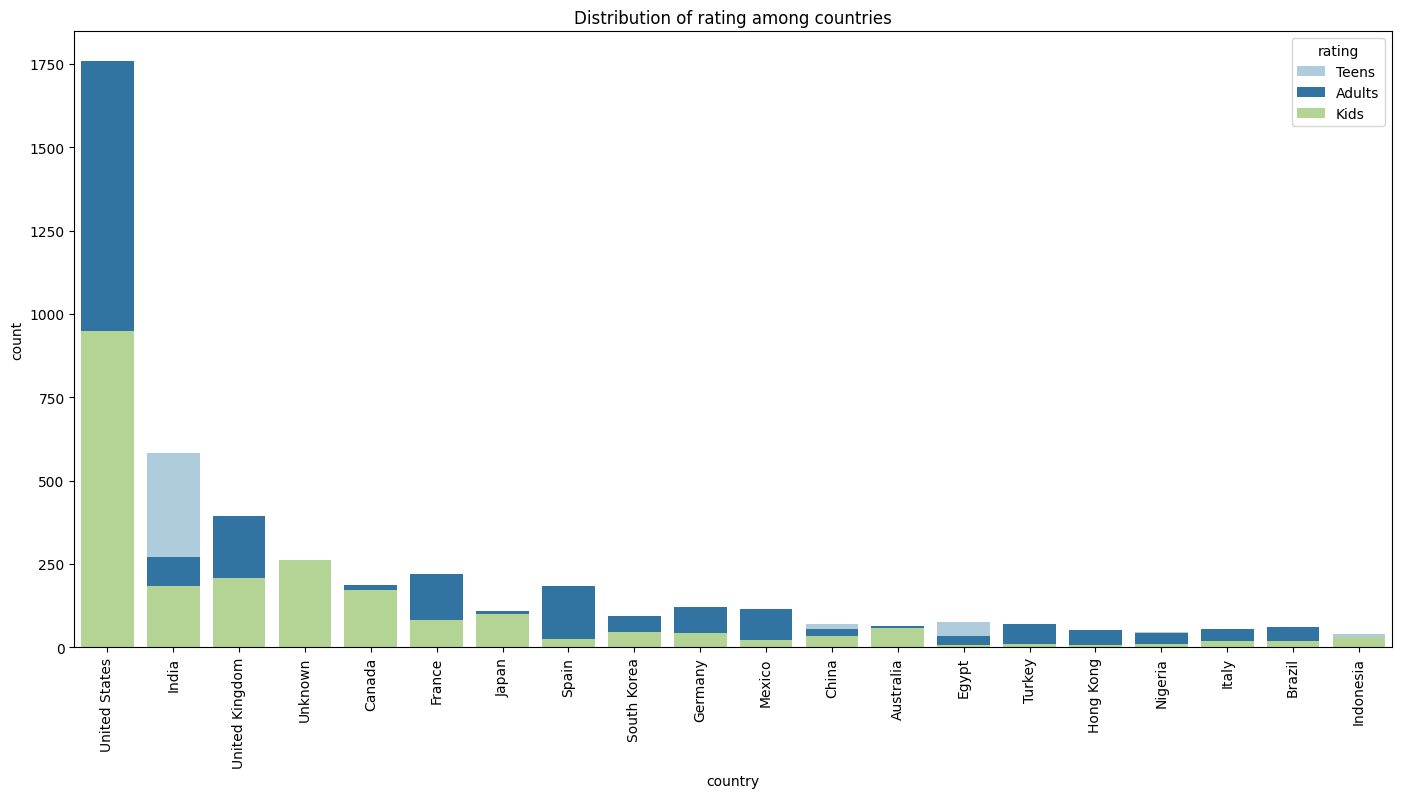

In [158]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution of rating among countries')
sns.countplot(data=df_temp, x='country', hue = 'rating', dodge=False, order = df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()

Inference

We can see the in US and UK there is no content specially made for the teens, whereas in India we can see the that most of the content is made for teens.

Recommendation

More content for teens should be added to atract newer audiences.

We have completed our Exploratory Data Analysis! Thank You !